## MBA em Ciência de Dados
# Redes Neurais e Arquiteturas Profundas

### <span style="color:darkred">Módulo 8 -  Introdução ao Aprendizado por Reforço</span>


### <span style="color:darkred">Exercícios</span>

Moacir Antonelli Ponti

CeMEAI - ICMC/USP São Carlos

---

#### <span style="color:red">Recomenda-se fortemente que os exercícios sejam feitos sem consultar as respostas antecipadamente.</span>

---

## Parte 1: Exercícios essenciais

### Exercício 1)

Qual alternativa descreve a comparação entre os objetivos da análise de agrupamentos e o aprendizado por reforço?

 (a) A análise de agrupamentos visa encontrar estrutura nos dados com base na similaridade ou diferença em suas características, enquanto que o aprendizado por reforço objetiva maximizar recompensa futura mapeando observações em ações por meio de uma política<br>
 (b) A análise de agrupamentos e aprendizado por reforço não possuem supervisão, possuindo algoritmos para treinamento similar, sua diferença está apenas na formulação do problema<br>
 (c) A análise de agrupamentos é não supervisionada, enquanto que o aprendizado por reforço é semi-supervisionado<br>
 (d) A análise de agrupamentos visa encontrar estrutura nos dados com base em suas características, enquanto que o por reforço visa encontrar um mapeamento entre características e as melhores ações possíveis segundo previamente rotuladas por um especialista<br>

---

### Exercício 2)

São componentes fundamentais do aprendizado por reforço:

 (a) Policy learning, estados e redes neurais profundas<br>
 (b) Histórico, camadas convolucionais, agente e inicialização<br>
(c) Agente, ambiente, estado, política de ação e função valor<br>
 (d) Value learning, estados e redes neurais profundas<br>


---
### Exercício 3)

Qual os passos básicos de um algoritmo de aprendizado de políticas (policy learning)?

 (a) Inicializar agente, com a política atual executar uma ação, obter uma recompensa, reforçar a política atual se essa produziu recompensa positiva nessa iteração.<br>
 (b) Inicializar agente, executar política até estado terminal, e repetir esse processo múltiplas vezes, selecionando o episódio com a maior recompensa total<br>
 (c) Inicializar agente, executar política até estado terminal, armazenar: estados, ações e recompensas, reduzir probabilidade de ações com baixa recompensa, Aumentar probabilidade de ações com alta recompensa<br>
 (d) Inicializar agente, utilizar rede neural para otimizar a melhor política em cada ação realizada.<br>

---
### Exercício 4)

Dado um problema, como projetá-lo para ser resolvido com aprendizado por reforço?

(a) Organizar os dados em pares $(x,y)$ sendo $x$ os dados de entrada e $y$ o espaço de saída ou alvo para que seja aprendido um mapeamento $X \rightarrow Y$<br>
(b) Formular o problema como o de um agente que executa ações e maximiza a recompensa dessas ações com base na solução encontrada<br>
(c) Coletar dados e organizá-los em uma base dividida em instâncias $x \in X$ para que sejam inspecionadas por funções de distância e particionar o espaço $X$<br>
(d) Projetar o problema para funcionar com um agente que explora um ambiente e encontra o resultado por tentativa e erro com backtracking<br>


---

### Exercício 5)

Carregue o ambiente `Pendulum-v1`. Procure mais obre esse ambiente em https://gymnasium.farama.org/environments/classic_control/pendulum/.

Como é formulado o espaço de ações e observação desse problema?

 a) Espaço de ações: contínuo entre -1 e 1; Espaço de Observações: 2 valores contínuos.<br>
 b) Espaço de ações: contínuo entre -1 e 1; Espaço de Observações: 3 valores contínuos.<br>
 c) Espaço de ações: contínuo entre -2 e 2; Espaço de Observações: 2 valores contínuos.<br>
 d) Espaço de ações: contínuo entre -2 e 2; Espaço de Observações: 3 valores contínuos.<br>
.

In [ ]:
#%%capture
!pip install gymnasium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 958.1/958.1 kB 14.3 MB/s eta 0:00:00


In [ ]:
import gymnasium as gym

In [ ]:
env = gym.make("Pendulum-v1")
env.observation_space

Box([-1. -1. -8.], [1. 1. 8.], (3,), float32)

In [ ]:
env.action_space

Box(-2.0, 2.0, (1,), float32)

---

### Exercício 6)

Retome o problema do taxi visto em aula. Sem realizar aprendizado, isso é, apenas usando ações aleatórias, defina a semente random.seed(1) e execute 10000 episódios até o fim, armazenando no final de cada episódio a recompensa total obtida e o número de passos necessários para finalizar o episódio. Calcule a média de passos por episódio e a média de recompensas por episódio.

Qual alternativa descreve o valor da média de recompensas e média de passos, sem considerar casas decimais?

a) Média de recompensas é negativa, Média de passos é próxima a 200<br>
 b) Média de recompensas é negativa, Média de passos é próxima a 50<br>
 c) Média de recompensas é positiva, Média de passos é próxima a 200 <br>
 d) Média de recompensas é positiva, Média de passos é próxima a 50<br>

In [ ]:
import gymnasium as gym
import numpy as np
import random
from IPython.display import clear_output


In [ ]:
env = gym.make("Taxi-v3")
print("observation_space")
env.observation_space

observation_space


Discrete(500)

In [ ]:
env = gym.make("Taxi-v3")
print("action_space")
env.action_space

action_space


Discrete(6)

<function IPython.core.display.clear_output(wait=False)>

In [ ]:

# historico
episodios = []

random.seed(1)

rewards = []
verbose = False
n_episodios = 1000

for t in range(1, n_episodios+1):
  s = env.reset()

  episode_over = False
  step = 0
  r_total = 0
  while not episode_over:
    # gerar acao
    action = env.action_space.sample()
    # realizar acao
    observation, reward, terminated, truncated, info = env.step(action)

    if verbose:
      print(f"<< Step = {step}>>")
      print("observation: ", observation)
      print("reward: ", reward)
      print("terminated: ", terminated)
      print("truncated:", truncated)
      print("info:", info)
      print()

    episode_over = terminated or truncated
    step += 1
    r_total += reward

  episodios.append(step)
  rewards.append(r_total)

  if t % 5 == 0:
    clear_output(wait=True)
    print(t)

1000


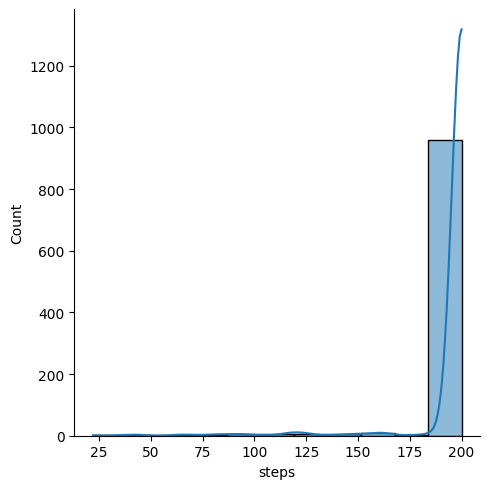

In [ ]:
import seaborn as sns
import pandas as pd

data = pd.DataFrame({"steps": episodios})
sns.displot(data=data, x="steps", kde=True)

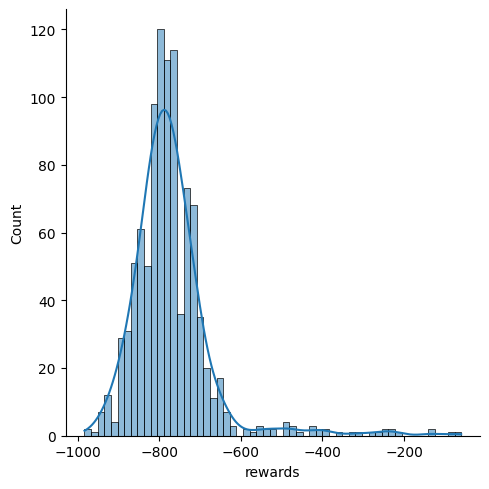

In [ ]:
data = pd.DataFrame({"rewards": rewards})
sns.displot(data=data, x="rewards", kde=True)

In [ ]:
np.mean(episodios)

196.501

In [ ]:
np.mean(rewards)

-771.514

---
## Parte 2: Exercícios Complementares

---

### Exercício 7)

Retome o problema do taxi visto em aula, utilizando o mesmo algoritmo de Value Learning, no qual a cada passo utilizamos um método de "exploration" obtendo amostras do espaço de ações por meio do `env.action_space.sample()`. Nesse exercício, vamos executar também "exploitation". Para isso modifique o treinamento conforme abaixo:
1. Crie uma nova variável `tau` que definirá a chance do algoritmo realizar "exploration".
2. Carregue o pacote `random` e antes dos episódios defina `random.seed(1)`
3. Substitua a linha em que a ação é selecionada por um condicional:
    * Se `random.uniform(0, 1)` for menor ou igual a `tau`, então realize "exploration" (da mesma forma como estava no algoritmo dado em aula)
    * Caso contrário, então realize "exploitation", isso é, obtendo a ação não aleatória, mas a partir da tabela Q aprendida até agora com `np.argmax(q_table[s])`
    
Execute dois treinamentos, 1) com `tau=0.9`, 2) com `tau=0.3`, por 3000 episódios, e logo após teste com 50 episódios novos, medindo a média de recompensas totais e média de passos por episódio. Qual foi o resultado, comparativamente?

OBS: lembre-se de definer `random.seed(1)` antes de iniciar cada experimento. Use alpha = 0.1 e gamma = 0.4
    
 a) Maior taxa de *exploitation* beneficiou o treinamento, o agente alcançou uma política que resultou em menos passos e maior recompensa média, mas mesmo usando mais **exploration** o agente também aprendeu uma política significativamente melhor do que aleatória.<br>
 b) Maior taxa de **exploration** beneficiou o treinamento, tendo o agente alcançado uma política que resultou em menos passos e maior recompensa média, enquanto que com maior *exploitation* o agente não foi capaz de aprender uma política significativamente melhor do que aleatória.<br>
 c) Os resultados foram muito similares, não sendo possível dizer qual abordagem é melhor, ambas obtiveram alguma melhoria no sentido da política aprendida<br>
 d) Maior taxa de **exploration** beneficiou o treinamento, o agente alcançou uma política que resultou em menos passos e maior recompensa média, mas mesmo usando mais *exploitation* o agente também aprendeu uma política significativamente melhor do que aleatória.<br>

In [ ]:
import gymnasium as gym
import numpy as np
import random
from IPython.display import clear_output


In [ ]:
env = gym.make("Taxi-v3")

In [ ]:
# tabela Q
q_table1 = np.zeros((env.observation_space.n, env.action_space.n))
q_table1.shape

(500, 6)

In [ ]:
np.argmax(q_table1[450, :])

0

In [ ]:
env.reset()


(131, {'prob': 1.0, 'action_mask': array([1, 1, 0, 1, 0, 0], dtype=int8)})

In [ ]:
# hiperparametros
alpha = 0.1
tau = 0.9
gamma = 0.4

# historico
episodios = []
rewards = []

random.seed(1)
n_episodios = 1000

# episodios
for t in range(1, n_episodios+1):
    state, _ = env.reset()
    epochs = 0
    total_rewards = 0
    episode_over = False

    while not episode_over:

      if random.uniform(0, 1) <= tau:
        # exploration
        action = env.action_space.sample()
      else:
        # exploitation
        action = np.argmax(q_table1[state])

      # realizar acao
      observation, reward, terminated, truncated, info = env.step(action)

      # (s, a) - Q(s, a)
      valor_anterior = q_table1[state, action]
      proximo_valor = np.max(q_table1[observation])

      novo_valor = (1-alpha)*valor_anterior + alpha*(reward + gamma*proximo_valor)
      q_table1[state, action] = novo_valor

      state = observation
      epochs += 1
      total_rewards += reward
      episode_over = terminated or truncated
    episodios.append(epochs)
    rewards.append(total_rewards)

    if t % 5 == 0:
      clear_output(wait=True)
      print(t)

1000


In [ ]:
np.mean(episodios)

159.136

In [ ]:
np.mean(total_rewards)

-286.0

---

### Exercício 8)

Tente utilizar o mesmo algoritmo anterior, agora para o ambiente `MountainCar-v0`. Logo ao definir a tabela Q surge um erro. Como interpretar esse erro?

 a) Esse problema é muito simples e contem poucas ações assim não conseguimos definir a tabela Q<br>
 b) O espaço de ações desse problema não é discreto. Assim, não é possível definir diretamente um número de colunas para a tabela<br>
 c) O espaço de observações (ou quantidade de estados) desse problema não é discreto. Assim, não é possível definir diretamente um número de linhas para a tabela<br>
 d) O espaço de ações e de observações (ou quantidade de estados) são contínuos não permitindo encontrar diretamente um número de elementos para a tabela<br>


In [ ]:
env = gym.make("MountainCar-v0")


---

### Exercício 9)

Para o caso em que não conseguimos definir uma tabela Q diretamente, considere as seguintes opções:

I - Projetar uma Deep Q-Network que receba o estado e dê como saída os valores preditos para cada ação<br>
II - Projetar um mecanismo basedo em Policy Learning, aprendendo diretamente probabilidades de selecionar ações a partir dos estados<br>
III - Criar múltiplas tabelas Q, uma para cada ação<br>
IV - Projetar um algoritmo de Value learning que aprenda as distribuições dos valores ao invés dos valores diretamente<br>

São viáveis as opções:

 a) I e II <br>
 b) I e IV<br>
 c) I e III <br>
 d) II e IV<br>
